In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Adjust display options
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_colwidth', None)  # Show full column width

df = pd.read_excel('../Data/legendary_lord_defeat_traits.xlsx')

In [3]:
# Define the labeling criteria
def label_trait(effect):
    # Define criteria for 'strong'
    strong_keywords = ['+30%', '+40%', '+50%', 'immense', 'huge', 'enormous', 'greatly', '+20%', '+25%', '+15%']
    # Define criteria for 'weak'
    weak_keywords = ['+2%', '+5%', '+1%', 'slight', 'minor', 'small', '+10%', '+8%', '+6%']
    # Define criteria for 'balanced'
    balanced_keywords = ['+10%', '+12%', 'moderate', '+15%', '+8%', 'both', 'combination']

    # Convert to lower case for case-insensitive matching
    effect_lower = effect.lower()
    
    # Apply the criteria to classify the effect
    if any(keyword in effect_lower for keyword in strong_keywords):
        return 'strong'
    elif any(keyword in effect_lower for keyword in weak_keywords):
        return 'weak'
    elif any(keyword in effect_lower for keyword in balanced_keywords):
        return 'balanced'
    else:
        # Default to balanced if no strong/weak indicators are found
        return 'balanced'

# Apply the labeling function to the DataFrame
df['Label'] = df['Effect'].apply(label_trait)

In [4]:
df.columns

Index(['Trait', 'Lord that must be defeated', 'Effect', 'Description',
       'Label'],
      dtype='object')

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the 'Effect' and 'Description' column
df['Processed_Effect'] = df['Effect'].apply(preprocess_text)
df['Processed_Description'] = df['Description'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lardex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lardex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Processed_Effect'])

# Convert labels to numerical format
y = df['Label'].map({'strong': 2, 'balanced': 1, 'weak': 0})

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the Naive Bayes classifier
model = MultinomialNB(alpha=0.1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.64      0.82      0.72        11
           2       0.50      0.33      0.40         3

    accuracy                           0.60        20
   macro avg       0.55      0.49      0.51        20
weighted avg       0.58      0.60      0.58        20



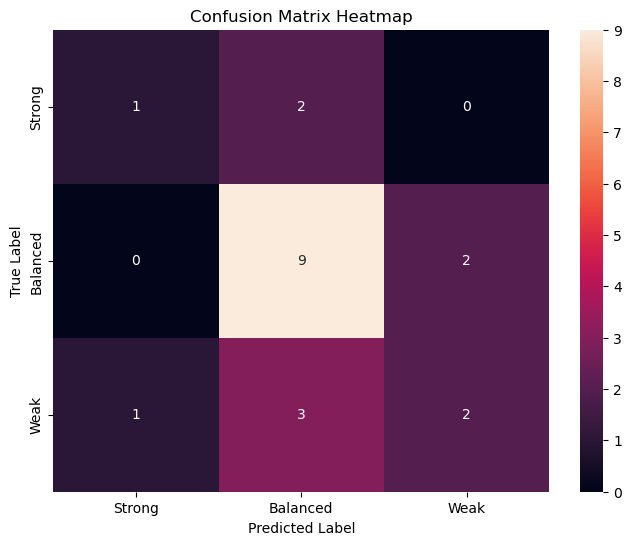

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[2, 1, 0])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Strong', 'Balanced', 'Weak'], yticklabels=['Strong', 'Balanced', 'Weak'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

# Display the heatmap
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning the alpha parameter for Naive Bayes
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.1}
